In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# ---- For JSD calculation:
from scipy.special import kl_div
from scipy.stats import entropy


In [4]:
O3 = pd.read_csv("real_events_O3_ALL.csv")
O4 = pd.read_csv("real_events_O4_ALL.csv")

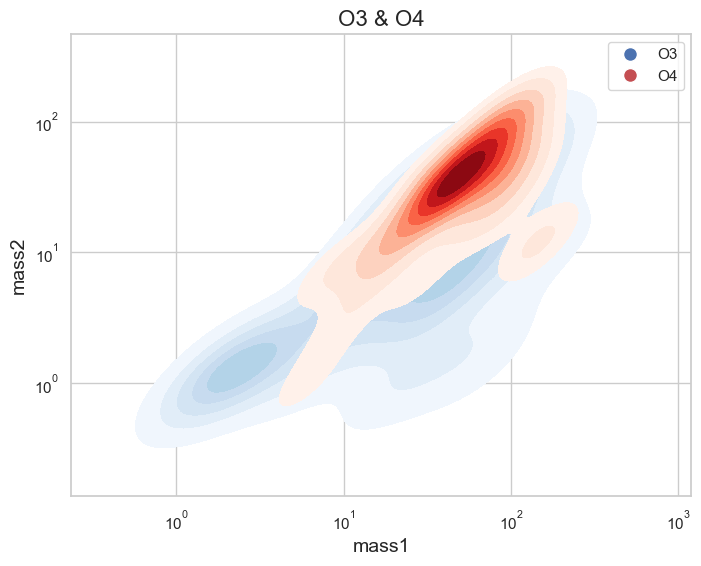

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create a single plot with overlaid KDEs from both datasets
plt.figure(figsize=(8, 6))  # Set the figure size
sns.kdeplot(data=O3, x="mass1", y="mass2", fill=True, cmap="Blues", label="O3", log_scale=True)
sns.kdeplot(data=O4, x="mass1", y="mass2", fill=True, cmap="Reds", label="O4", log_scale=True)

# Set labels and title for the plot
plt.xlabel("mass1", fontsize=14)
plt.ylabel("mass2", fontsize=14)
plt.title("O3 & O4", fontsize=16)

# Create custom legend labels and handles
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='O3', linewidth=0),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='O4', linewidth=0)
]

# Display legend with custom labels and handles
plt.legend(handles=legend_elements)

# Show the plot
plt.show()


In [ ]:
#luminosity distance , total mass, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


<Axes: xlabel='Density', ylabel='mass2'>

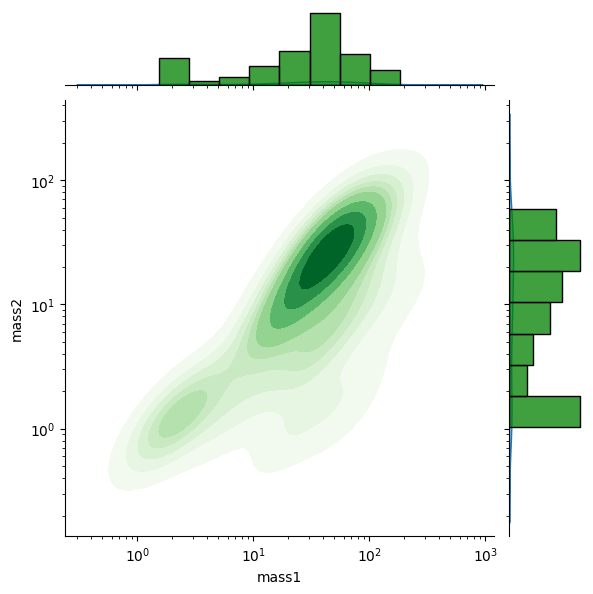

In [16]:
joint_plot = sns.jointplot(data=O3, x="mass1", y="mass2", kind="kde", fill=True,log_scale = True)

joint_plot.plot_joint(sns.kdeplot, fill=True, cmap="Greens", cbar=False, levels=10, linewidths = 1)

sns.histplot(data=O3, x="mass1", ax=joint_plot.ax_marg_x, color="green", linewidth=1)
sns.histplot(data=O3, y="mass2", ax=joint_plot.ax_marg_y, color="green", linewidth=1)

In [37]:
def jsd(P, Q):

    # ---- I need to crop the data in some way so that the midpoint can be computed ??? Might need to fix this 

    min_length = min(len(P), len(Q))
    P = P[:min_length]
    Q = Q[:min_length]

    
    # Compute the midpoint distribution
    M = 0.5 * (P + Q)
    
    # Calculate KL Divergences from p and q to the midpoint distribution
    kl_PM = entropy(P, M)
    kl_QM = entropy(Q, M)
    
    # Compute Jensen-Shannon Divergence
    jsd_value = 0.5 * (kl_PM + kl_QM)
    return jsd_value

list = ["chirp_mass", "snr", "mass1", "mass2"]
for variable in list:
    O3_data = O3[variable].values
    O4_data = O4[variable].values
    jsd_value = jsd(O3_data, O4_data)
    print(jsd_value, "is the JSD value for {}".format(variable))


0.14978164157465743 is the JSD value for chirp_mass
0.0510949659995982 is the JSD value for snr
0.12674039899064157 is the JSD value for mass1
0.20126025670406714 is the JSD value for mass2


In [ ]:
# NOTE that the further from 0 the JSD is, the more dissimilar the two distributions are 

In [ ]:
# add tsne plots

In [ ]:
# look at retractions / lower significance threshold (to get more data)

In [ ]:
# Q: Why are there 2 events identified by GstLAL in O4 that have exactly the same mass ratios?

In [ ]:
# Send the fomrula for chirp mass to Reese (also send the big paper to him)

In [1]:
import pandas as pd

In [2]:
test = pd.read_csv("O3glitches.csv")

In [4]:
test.columns

Index(['Unnamed: 0', 'GPStime', 'peakFreq', 'snr', 'amplitude', 'centralFreq',
       'duration', 'bandwidth', 'chisq', 'chisqDof', 'confidence', 'id', 'ifo',
       'label', 'imgUrl', 'Q-value'],
      dtype='object')

In [5]:
test

,Unnamed: 0,GPStime,peakFreq,snr,amplitude,centralFreq,duration,bandwidth,chisq,chisqDof,confidence,id,ifo,label,imgUrl,Q-value
0,0,1.248612e+09,30.734,11933.828,2.330000e-19,3980.241,13.000,7940.482910,0.0,0.0,1.000,RcVMzIZSn3,H1,Extremely_Loud,https://ldas-jobs.ligo-wa.caltech.edu/~gravity...,11.314
1,1,1.242079e+09,411.865,10072.313,4.590000e-20,3980.241,12.000,7940.482910,0.0,0.0,1.000,cBMDLJ6aIr,H1,Extremely_Loud,https://ldas-jobs.ligo-wa.caltech.edu/~gravity...,11.314
2,2,1.253721e+09,269.285,9892.720,3.850000e-20,3980.241,6.938,7940.482910,0.0,0.0,1.000,cqzCQX5uox,H1,Extremely_Loud,https://ldas-jobs.ligo-wa.caltech.edu/~gravity...,5.657
3,3,1.249450e+09,333.030,9645.596,4.130000e-20,3980.241,13.500,7940.482910,0.0,0.0,1.000,0uEosD0VgH,H1,Extremely_Loud,https://ldas-jobs.ligo-wa.caltech.edu/~gravity...,11.314
4,4,1.243002e+09,30.734,9609.635,2.070000e-19,3980.241,13.500,7940.482910,0.0,0.0,1.000,V5AtA4mMXg,H1,Extremely_Loud,https://ldas-jobs.ligo-wa.caltech.edu/~gravity...,11.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436871,436871,1.263210e+09,12.252,7.508,1.290000e-20,1154.301,3.000,2284.951416,0.0,0.0,0.202,9nPCwbeXhe,L1,Low_Frequency_Lines,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,22.627
436872,436872,1.262002e+09,49.208,50.442,2.990000e-22,2401.015,1.500,4771.440918,0.0,0.0,0.202,htzKv1xNqw,L1,Tomte,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,5.657
436873,436873,1.267608e+09,23.290,9.430,2.490000e-22,3410.175,0.750,6784.320801,0.0,0.0,0.189,wfrtYkcbzs,L1,Violin_Mode,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,45.255
436874,436874,1.265914e+09,24.187,7.628,2.170000e-22,2476.626,1.750,4933.251953,0.0,0.0,0.181,i6qhSPJZdr,L1,Fast_Scattering,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,11.314
